Mean Squared Error:
238318035.83027577


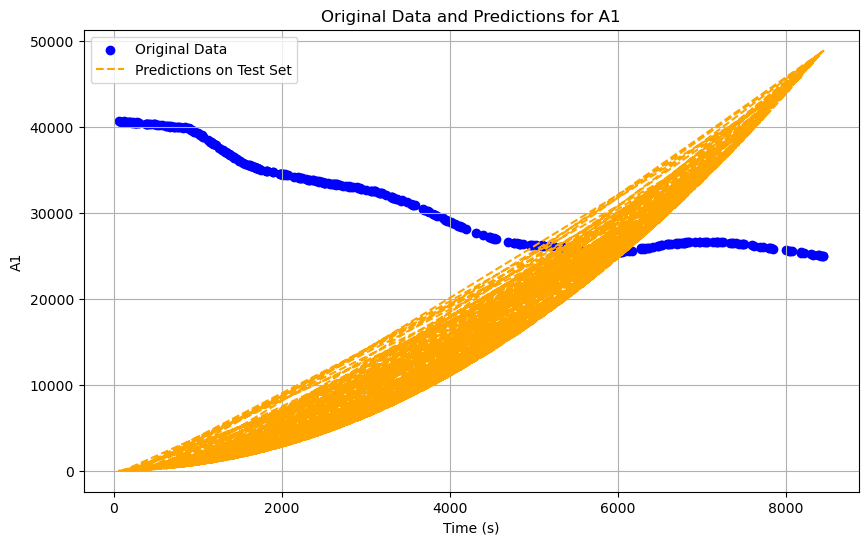

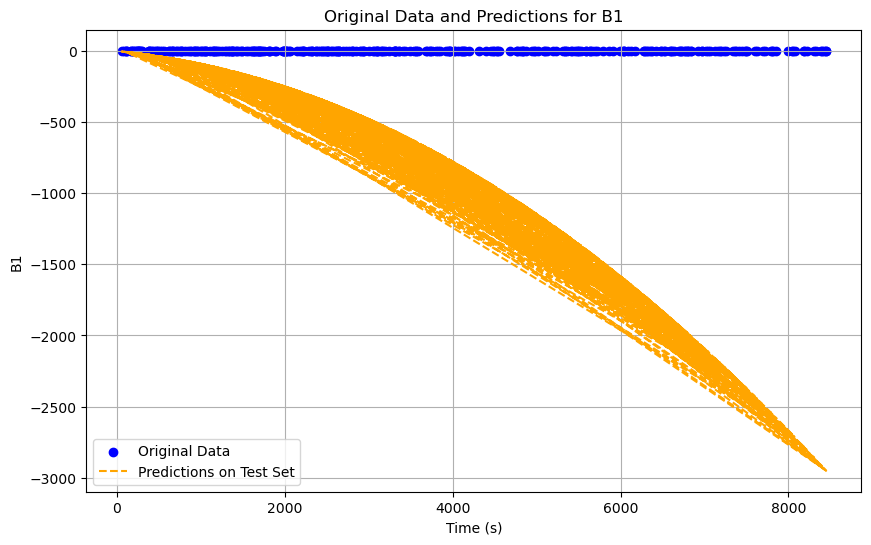

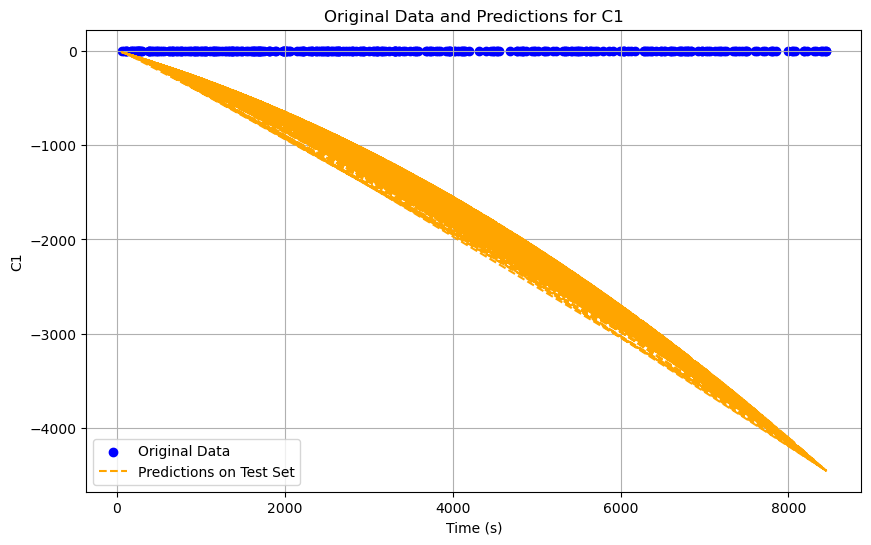

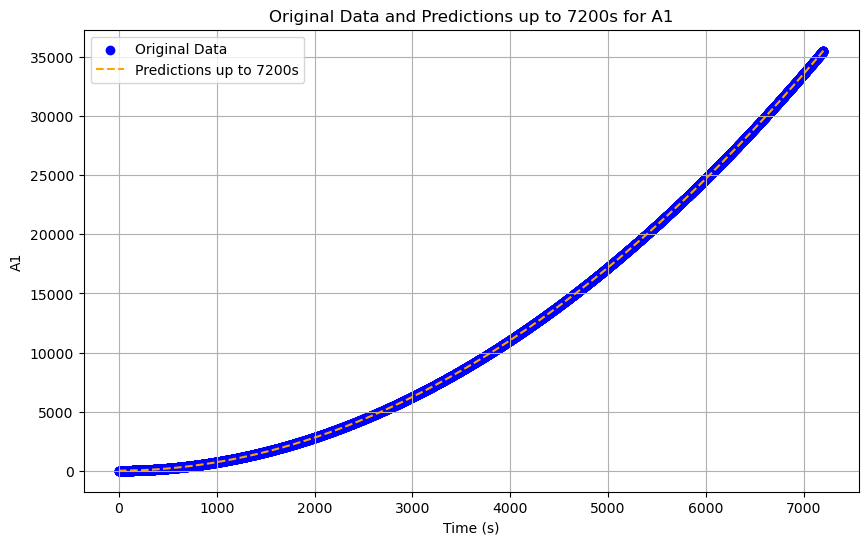

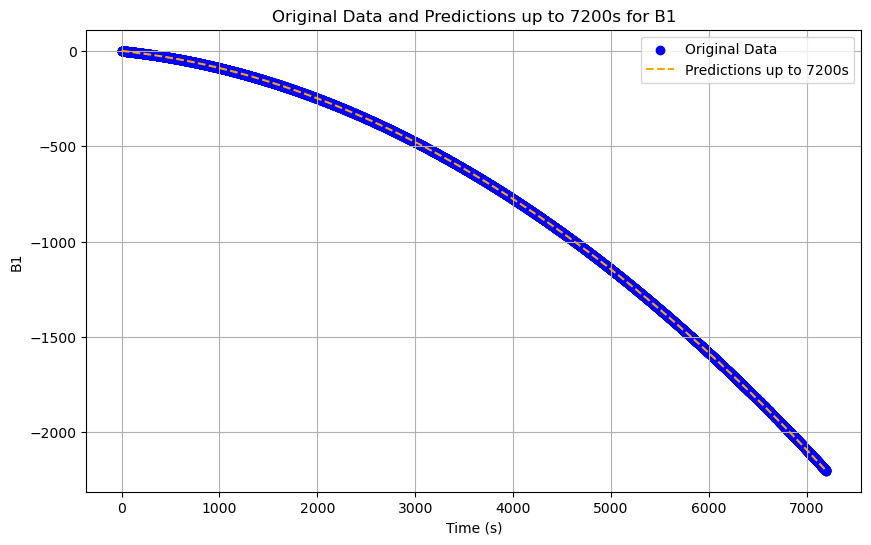

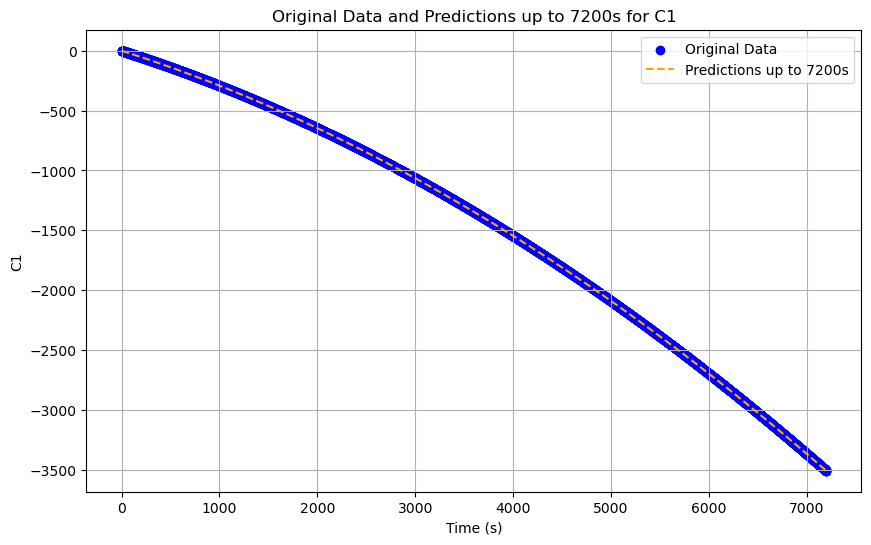

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame
df = pd.read_excel('result_.xlsx')

df = df.dropna()

results_df = df

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A1', 'B1', 'C1']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Train a Polynomial Regression model for each coefficient
models = {}
degree = 2  # Adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

for target_column in targets.columns:
    # Transform features to polynomial features
    features_train_poly = poly.fit_transform(features_train)
    features_test_poly = poly.transform(features_test)
    
    # Train an MLP Regressor model
    model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
                         batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                         max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                         warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                         validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                         n_iter_no_change=10, max_fun=15000)
    model.fit(features_train_poly, targets_train[target_column])
    models[target_column] = (model, poly)

# Evaluate the models on the test set
predictions = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_test_poly = poly.transform(features_test)
    predictions[target_column] = model.predict(features_test_poly)

# Calculate mean squared error for each target
mse = mean_squared_error(targets_test, predictions)
print(f'Mean Squared Error:\n{mse}')

# Train the models on the entire dataset up to 7200s
features_full = pd.DataFrame({'Time (s)': range(7201)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_full_poly = poly.transform(features_full)
    predictions_full[target_column] = model.predict(features_full_poly)

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)

# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 7200s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 7200s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 7200s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:

df = df.dropna()

In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from pyswarm import pso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Load the dataset
df = pd.read_excel('result_.xlsx')
df = df.dropna()

# Split data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Define the objective function (MAE)
def objective_function(params):
    num_layers, activation_function, alpha = params
    
    # Convert activation function string to actual function
    activation_functions = ['identity', 'logistic', 'tanh', 'relu']
    activation_function = activation_functions[int(activation_function)]
    
    # Generate hidden layer sizes based on the number of layers
    num_layers = int(round(num_layers))
    hidden_layer_sizes = tuple([int(features_train.shape[1] * 2)] * num_layers)
    
    # Train MLP Regressor with given hyperparameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, alpha=alpha, random_state=42)
    model.fit(features_train, targets_train)
    
    # Predict on test set
    predictions = model.predict(features_test)
    
    # Calculate MAE
    mae = mean_absolute_error(targets_test, predictions)
    
    # Print parameters and MAE for each iteration
    print(f"Number of Layers: {num_layers}, Activation Function: {activation_function}, Alpha: {alpha}, MAE: {mae}")
    
    return mae

# Define the search space for hyperparameters
# We'll optimize for number of layers, activation function, and regularization parameter alpha
lb = [1, 0, 0.0001]  # Lower bounds for hyperparameters
ub = [5, 3, 0.1]  # Upper bounds for hyperparameters

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Print the best hyperparameters found by PSO
print("Best Hyperparameters (Number of Layers, Activation Function, Alpha):", best_params)

# Train MLP Regressor with optimized hyperparameters
num_layers, activation_function, best_alpha = best_params
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
activation_function = activation_functions[int(activation_function)]
num_layers = int(round(num_layers))
hidden_layer_sizes = tuple([int(features_train.shape[1] * 2)] * num_layers)

model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, alpha=best_alpha, random_state=42)
model.fit(features_train, targets_train)

# Evaluate the model
predictions = model.predict(features_test)
mae = mean_absolute_error(targets_test, predictions)
print("MAE on Test Set:", mae)


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: tanh, Alpha: 0.05930668816307977, MAE: 10652.803452464199


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.01884935508110565, MAE: 10653.72228512629


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: tanh, Alpha: 0.08011243592154829, MAE: 10652.58693645


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.02072178517697784, MAE: 6238.67064941236


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.06291984185114623, MAE: 6238.670649411641


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09813021711005805, MAE: 10653.72234239393


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.04659830563079508, MAE: 6286.823323379237


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.053806363986612496, MAE: 10652.825021013421


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: tanh, Alpha: 0.005124895353081101, MAE: 10652.586888370091


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.0709379917319344, MAE: 6242.210910228422


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 5, Activation Function: tanh, Alpha: 0.037504036102209926, MAE: 10652.41781684805


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: tanh, Alpha: 0.0001, MAE: 10652.586885148461


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 5, Activation Function: logistic, Alpha: 0.1, MAE: 10652.784587308759


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.042975662895349216, MAE: 10653.085962686886


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.0646883420588748, MAE: 10653.722318216338


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.09683722311076648, MAE: 6242.210910228773


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: tanh, Alpha: 0.0872072447881142, MAE: 10652.803473841415


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.08822456139168439, MAE: 10652.825051746348


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: tanh, Alpha: 0.1, MAE: 10652.58694920138


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 5, Activation Function: tanh, Alpha: 0.046739891753170476, MAE: 10652.417818542743


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 5, Activation Function: logistic, Alpha: 0.0024983206525459154, MAE: 10652.784542402613


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.1, MAE: 6238.670649411014


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.06829731424093018, MAE: 10653.085930101957


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.07051546631478983, MAE: 10653.722322426827


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.1, MAE: 10653.722343746993


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: tanh, Alpha: 0.1, MAE: 10652.81178488889


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.1, MAE: 10653.085889313332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06798746766627299, MAE: 10652.825033463667


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.03306945530339647, MAE: 10652.825002942047


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.07095596993684031, MAE: 10653.722322745143


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.07997915370305031, MAE: 6286.8233233786705


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.1, MAE: 10653.722343746993


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: logistic, Alpha: 0.1, MAE: 10653.536698168216


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.1, MAE: 10653.722343746993


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.07584935721278685, MAE: 10653.085920384741


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.0403084240332328, MAE: 10653.085966119505


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.06968195056161605, MAE: 10653.722321824533


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.08288305176037089, MAE: 6286.823323378616


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.1, MAE: 10653.722343746993


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09910612962115267, MAE: 10653.722343100124


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09112877790805801, MAE: 6237.855035359906


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.07577683641563407, MAE: 10653.085920478048


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.04815355306347545, MAE: 10653.72230627133


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.07393418950178197, MAE: 6242.210910228466


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.08180317474081844, MAE: 6286.82332337864


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09665604282977626, MAE: 10653.722341327159


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.08911900219133732, MAE: 6237.8550353600185


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.0690553700258, MAE: 10653.085929126542


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.05345567506644376, MAE: 10653.722310101266


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08583528945892469, MAE: 6242.210910228627


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.07295249033450986, MAE: 6286.823323378786


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09934286847959987, MAE: 6286.82332337834


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.09205055278798126, MAE: 10653.085899540272


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09151295203657119, MAE: 6237.855035359873


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.07050351328978888, MAE: 10653.722322418203


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.05578335180136468, MAE: 10653.722311782765


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.08299141213636402, MAE: 6238.670649411303


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.07322068215152024, MAE: 6286.823323378777


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.0984444794101131, MAE: 6286.823323378357


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09021208678550097, MAE: 10653.722336664458


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.0946325841930847, MAE: 6237.8550353596975


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: tanh, Alpha: 0.07075029325744278, MAE: 10652.81177150009


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.06826808887553737, MAE: 10653.085930139563


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.1, MAE: 6238.670649411014


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08725110168035939, MAE: 6242.210910228639


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.07698736651283926, MAE: 6242.210910228502


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09778202788020754, MAE: 6286.823323378362


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.08876961807709922, MAE: 10653.722335620803


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09621140815182999, MAE: 6237.855035359596


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: tanh, Alpha: 0.05989595555115627, MAE: 10652.811766528299


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.0582438072373494, MAE: 10653.08594303856


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.1, MAE: 6238.670649411014


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09509454627723957, MAE: 6286.823323378411


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08184689948312733, MAE: 6242.210910228573


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09789775022437369, MAE: 6286.823323378361


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09071435572592765, MAE: 10653.722337027866


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09786700064447906, MAE: 6237.855035359505


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.06383456351346281, MAE: 10653.085935844409


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.039660474010114834, MAE: 10653.085966953398


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09405199613727364, MAE: 6286.823323378427


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: identity, Alpha: 0.08413966051189674, MAE: 6238.670649411283


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.0982274018135907, MAE: 6286.823323378362


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09234155560064206, MAE: 10653.722338205222


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09964951218990623, MAE: 6237.8550353593955


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.07585561401816326, MAE: 10653.722326285857


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.02920829871054738, MAE: 6242.210910227866


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09069956865906587, MAE: 6286.823323378484


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.09314423244636116, MAE: 6242.210910228721


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09870610645096242, MAE: 6286.823323378349


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09438206962677446, MAE: 10653.722339681704


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.07225825656576952, MAE: 10653.722323686203


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.05087671707594439, MAE: 6242.21091022816


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.08881212324911607, MAE: 6286.823323378515


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.0986074520918569, MAE: 6242.210910228787


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09875051219295189, MAE: 6286.823323378347


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09377029467938251, MAE: 10653.72233923903


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.07037271810852799, MAE: 10653.085927431483


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.06051735972730312, MAE: 6286.823323378999


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08905384171553132, MAE: 6242.210910228663


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.09514401249402482, MAE: 6242.210910228747


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09825080872194876, MAE: 6286.823323378358


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09470358721209324, MAE: 10653.72233991435


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.06508466744109724, MAE: 10653.085934235813


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.06954894941285109, MAE: 6286.823323378849


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08754830076929591, MAE: 6242.210910228648


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08958646185879007, MAE: 6242.210910228678


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09821069875834125, MAE: 6286.823323378361


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: tanh, Alpha: 0.0948088895459876, MAE: 10652.811782513669


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: logistic, Alpha: 0.06649098138876412, MAE: 10653.085932426236


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.07953773967882713, MAE: 6242.210910228535


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.09020591189927879, MAE: 6242.210910228678


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08825042638739061, MAE: 6242.210910228655


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09795159507763523, MAE: 6286.82332337836


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09322912855295659, MAE: 10653.722338847443


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06829157692852174, MAE: 10652.825033733525


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08581849400155718, MAE: 6242.210910228627


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09153168721130787, MAE: 6286.82332337847


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08997914448088187, MAE: 6242.21091022867


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.0984959319118305, MAE: 6286.823323378357


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.0920197541165686, MAE: 10653.72233797238


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 5, Activation Function: tanh, Alpha: 0.06469858156764687, MAE: 10652.417821831368


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.08596230271701269, MAE: 6242.210910228626


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09373197240753015, MAE: 6286.823323378431


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09132661495751072, MAE: 6286.823323378474


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09909881172994912, MAE: 6286.82332337834


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09203004722938987, MAE: 10653.72233797983


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.056444267969649166, MAE: 10652.825023314883


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.06652340867480094, MAE: 6286.823323378897


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09502925326958797, MAE: 6237.855035359663


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09197106541249453, MAE: 6286.8233233784595


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09885487008695994, MAE: 6237.855035359441


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09237440785142331, MAE: 10653.722338228998


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06009952144842292, MAE: 10652.82502651213


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.04603593938112136, MAE: 6286.823323379246


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.1, MAE: 6286.823323378332


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.0958003187441096, MAE: 6237.855035359623


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09176473621683881, MAE: 6286.823323378466


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09910491189260302, MAE: 6237.855035359422


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09254720711411125, MAE: 10653.722338354028


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 4, Activation Function: logistic, Alpha: 0.0682355428413906, MAE: 10652.82503368379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.03819841697373493, MAE: 6286.823323379383


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 3, Activation Function: identity, Alpha: 0.1, MAE: 6242.210910228809


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.0968502165643008, MAE: 6237.855035359563


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: identity, Alpha: 0.09294327086120355, MAE: 6286.823323378444


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.09957597457093365, MAE: 6237.855035359396


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 2, Activation Function: tanh, Alpha: 0.09510744427388629, MAE: 10652.81178265029


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Layers: 1, Activation Function: identity, Alpha: 0.1, MAE: 6237.855035359379
Stopping search: maximum iterations reached --> 20
Best Hyperparameters (Number of Layers, Activation Function, Alpha): [1.12884075 0.57763307 0.1       ]
MAE on Test Set: 6237.855035359379


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 350050437.97692466


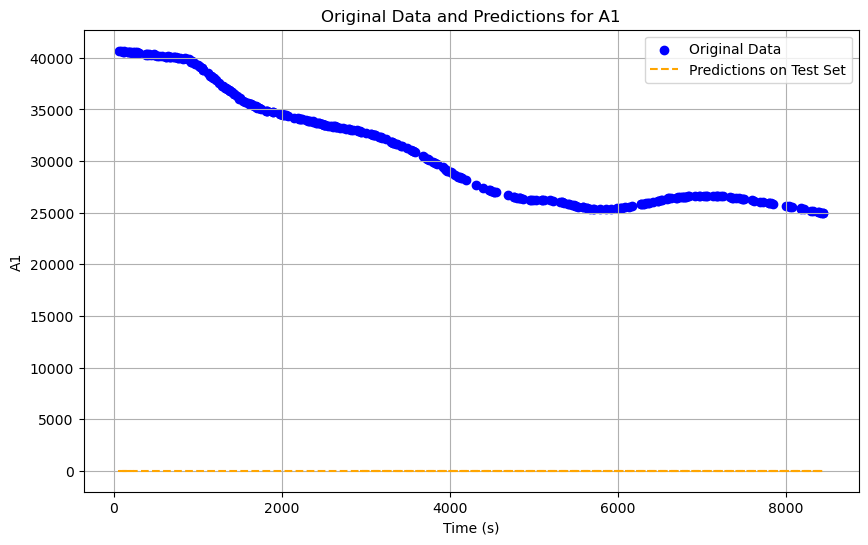

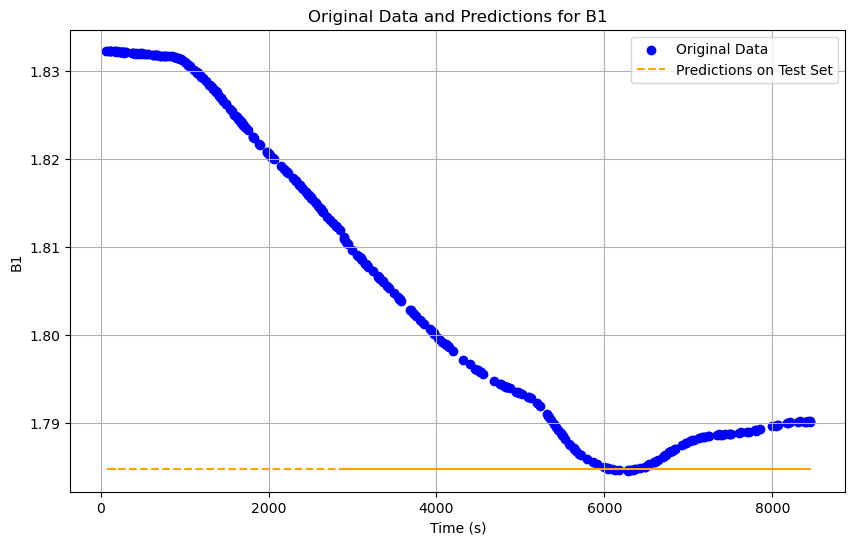

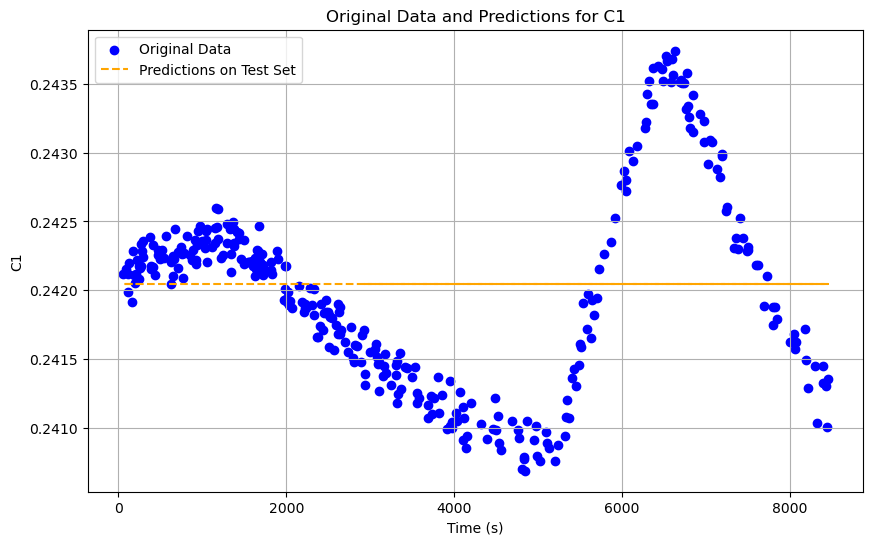

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_excel('result_.xlsx')
df = df.dropna()

# Define features and target
features = df[['Time (s)']]
targets = df[['A1', 'B1', 'C1']]

# Split data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Train MLP Regressor with specified hyperparameters
num_layers = 5
activation_function = 'logistic'
alpha = 0.09815501556410178

# Generate hidden layer sizes based on the number of layers
hidden_layer_sizes = tuple([int(features_train.shape[1] * 2)] * num_layers)

# Train MLP Regressor with given hyperparameters
model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, alpha=alpha, random_state=42)
model.fit(features_train, targets_train)

# Evaluate the model
predictions = model.predict(features_test)
mae = mean_squared_error(targets_test, predictions)
print("Mean Squared Error:", mae)

# Plot the predictions
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[:, i], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
import numpy as np
from sklearn.metrics import r2_score
from pyswarm import pso
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Load the dataset
df = pd.read_excel('result_.xlsx')
df = df.dropna()

# Define features and targets
features = df[['Time (s)']]
targets = df[['A1']]

# Split data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Define the objective function (R2)
def objective_function(params):
    num_layers, activation_function, alpha = params
    
    # Convert activation function string to actual function
    activation_functions = ['identity', 'logistic', 'tanh', 'relu']
    activation_function = activation_functions[int(activation_function)]
    
    # Generate hidden layer sizes based on the number of layers
    num_layers = int(round(num_layers))
    hidden_layer_sizes = tuple([int(features_train.shape[1] * 2)] * num_layers)
    
    # Train MLP Regressor with given hyperparameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, alpha=alpha, random_state=42)
    model.fit(features_train, targets_train)
    
    # Predict on test set
    predictions = model.predict(features_test)
    
    # Calculate R2 score
    r2 = r2_score(targets_test, predictions)
    
    # Print parameters and R2 score for each iteration
    print(f"Number of Layers: {num_layers}, Activation Function: {activation_function}, Alpha: {alpha}, R2 Score: {r2}")
    
    # Negative of R2 score since PSO minimizes
    return -r2

# Define the search space for hyperparameters
# We'll optimize for number of layers, activation function, and regularization parameter alpha
lb = [1, 0, 0.0001]  # Lower bounds for hyperparameters
ub = [5, 3, 0.1]  # Upper bounds for hyperparameters

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Print the best hyperparameters found by PSO
print("Best Hyperparameters (Number of Layers, Activation Function, Alpha):", best_params)

# Train MLP Regressor with optimized hyperparameters
num_layers, activation_function, best_alpha = best_params
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
activation_function = activation_functions[int(activation_function)]
num_layers = int(round(num_layers))
hidden_layer_sizes = tuple([int(features_train.shape[1] * 2)] * num_layers)

model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, alpha=best_alpha, random_state=42)
model.fit(features_train, targets_train)

# Evaluate the model
predictions = model.predict(features_test)
r2 = r2_score(targets_test, predictions)
print("R2 Score on Test Set:", r2)


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.07192574939071267, R2 Score: -35.44452882083984


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: tanh, Alpha: 0.01884270120706461, R2 Score: -35.44074369701263


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 1, Activation Function: logistic, Alpha: 0.08357460892628726, R2 Score: -35.45026246020366


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.07768621251983134, R2 Score: -16.18963304967037


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 2, Activation Function: identity, Alpha: 0.09071897181701016, R2 Score: -16.193098109750036


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.05851971467928845, R2 Score: -16.186223910544665


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 2, Activation Function: identity, Alpha: 0.005743030465835825, R2 Score: -16.193098109743676


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: logistic, Alpha: 0.051625335044602705, R2 Score: -35.445801854922635


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: tanh, Alpha: 0.05934029807026453, R2 Score: -35.44174321030828


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: logistic, Alpha: 0.03710700843995367, R2 Score: -35.44411135312204


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: logistic, Alpha: 0.08802975498398458, R2 Score: -35.44411135314303


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: relu, Alpha: 0.0001, R2 Score: -35.44984741118361


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: tanh, Alpha: 0.068510771305217, R2 Score: -35.44300137523686


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06859361931235612, R2 Score: -35.444530354970425


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.08615604354453521, R2 Score: -16.18622391054605


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.07053968514672132, R2 Score: -16.189633049670096


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 1, Activation Function: identity, Alpha: 0.0001, R2 Score: -17.786222942892895


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.0920219443563596, R2 Score: -16.189633049670917


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: identity, Alpha: 0.05794198271767271, R2 Score: -16.194940370235273


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 2, Activation Function: identity, Alpha: 0.019433774425635864, R2 Score: -16.193098109744703


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 2, Activation Function: logistic, Alpha: 0.09477647958945482, R2 Score: -35.444400169022074


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: relu, Alpha: 0.02059977361711195, R2 Score: -35.44984741118361


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: tanh, Alpha: 0.058439883039786616, R2 Score: -35.44174321030773


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06615254590237145, R2 Score: -35.44453037763272


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.08252948703056517, R2 Score: -16.18622391054587


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.06722503438124311, R2 Score: -16.189633049669975


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 1, Activation Function: identity, Alpha: 0.0001, R2 Score: -17.786222942892895


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.1, R2 Score: -16.18622391054674


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: identity, Alpha: 0.0573402924510957, R2 Score: -16.19494037023523


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 1, Activation Function: identity, Alpha: 0.012229462948279722, R2 Score: -17.786222942894952


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: logistic, Alpha: 0.08716824144640367, R2 Score: -35.444111353142674


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: tanh, Alpha: 0.03859068619016623, R2 Score: -35.44174321029638


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.05341975618473277, R2 Score: -35.4445303877435


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.06495839387229314, R2 Score: -35.4445303888806


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.08062076435461905, R2 Score: -16.186223910545774


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.059734844200270545, R2 Score: -16.189633049669684


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 2, Activation Function: identity, Alpha: 0.016252280894882985, R2 Score: -16.193098109744465


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.1, R2 Score: -16.18622391054674


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: identity, Alpha: 0.05762269325675332, R2 Score: -16.194940370235248


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: identity, Alpha: 0.014751972957532944, R2 Score: -16.1949403702324


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 3, Activation Function: logistic, Alpha: 0.0777456716213071, R2 Score: -35.444111353138794


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: logistic, Alpha: 0.0507249496506716, R2 Score: -35.4445303748509


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: logistic, Alpha: 0.053399867279580966, R2 Score: -35.445801854926394


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.06687492518101004, R2 Score: -16.186223910545092


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 5, Activation Function: identity, Alpha: 0.07152897240266506, R2 Score: -16.189633049670135


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of Layers: 4, Activation Function: identity, Alpha: 0.055758218945663046, R2 Score: -16.18622391054453
Stopping search: Swarm best objective change less than 1e-08
Best Hyperparameters (Number of Layers, Activation Function, Alpha): [4.03320551 0.87663953 0.05575822]
R2 Score on Test Set: -16.18622391054453


C:\Users\ivan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
